In [1]:
# Import necessary libraries for data manipulation and analysis
import numpy as np # Numerical operations
import pandas as pd # Data manipulation
from datetime import datetime, timedelta # Date operations

#Import necessary libraries for transformations
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from scipy.stats import skew, kurtosis

# Import libraries for plotting and visualization
import matplotlib.pyplot as plt # Matplotlib for basic plotting
import seaborn as sns # Seaborn for enhanced visualization
import plotly.express as px # Plotly for interactive plots

# Import libraries for time series analysis and modeling
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller Test for stationarity check
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin Test for stationarity check
from statsmodels.tsa.statespace.sarimax import SARIMAX # SARIMAX model for time series forecasting
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition for trend, seasonal, and residual components
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima #SARIMAX using pmdarima

# Import necessary libraries for computing acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots
from statsmodels.tsa.stattools import acf, pacf  # For computing autocorrelation and partial autocorrelation

#Import libraries for multicollineaarity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import libraries for transformations
import joblib



In [2]:
from SARIMAX import remove_multicollinear, calculate_vif
import datascript
from datascript import load_data, split_data
import os

SARIMAX for VISAYAS
DATA PREPROCESSING

In [3]:
#Import the necessary files
base_path = os.path.dirname(os.path.abspath(datascript.__file__))  # Gets the current working directory
complete_vis_gwap = load_data("VIS",'GWAP', features = False, transformed=False)
complete_vis_lwap = load_data("VIS",'LWAP', features = False, transformed=False)

In [4]:
GWAP = load_data("VIS",'GWAP', model='SARIMAX', features = False, transformed=True)
LWAP = load_data("VIS",'LWAP', model='SARIMAX', features = False, transformed=True)

GWAP_transformed_features = load_data("VIS",'GWAP', model='SARIMAX', features = True, transformed=True)

In [5]:
%run SARIMAX.py
#Prepare exogenous variables and check for multicollinearity
full_transformed_exog = GWAP_transformed_features.drop(columns=['GWAP'])
full_transformed_exog = full_transformed_exog.shift(1)
full_transformed_exog = full_transformed_exog.fillna(0)
full_exog_train, full_exog_test = split_data(full_transformed_exog, False)

exog_train = remove_multicollinear(full_exog_train, 10)
calculate_vif(exog_train)

final_exog = drop_unmatched_columns(full_transformed_exog, exog_train)

Dropping TMIN_Catbalogan with VIF of 51.36792312526932
Dropping TMAX_Catarman with VIF of 43.64626790595211
Dropping TMAX_Maasin with VIF of 40.98755993281044
Dropping TMAX_Roxas City with VIF of 31.438791077614287
Dropping TMAX_Dumaguete with VIF of 26.06539143097628
Dropping TMIN_Maasin with VIF of 24.55396424299972
Dropping TMIN_Roxas City with VIF of 18.840498323182718
Dropping TMIN_Catarman with VIF of 14.460175876248812
Dropping Demand with VIF of 12.585017194241601
Final VIF values:
                 feature       VIF
0              FLOW_VIS  7.244426
1       Reserve_GWAP_Fr  5.948152
2       Reserve_GWAP_Ru  3.869119
3       Reserve_GWAP_Rd  1.700528
4       Reserve_GWAP_Dr  7.370311
5   RAINFALL_Catbalogan  3.576478
6       TMAX_Catbalogan  7.826372
7   RAINFALL_Roxas City  2.047123
8     RAINFALL_Catarman  3.351565
9       RAINFALL_Maasin  2.630707
10   RAINFALL_Dumaguete  2.239345
11       TMIN_Dumaguete  9.039636


In [6]:
#Prepare the necessary datasets
#Target Variables
GWAP_train, GWAP_test = split_data(GWAP, False)
LWAP_train, LWAP_test = split_data(LWAP, False)

#Untransformed variables for verification 
untransformed_GWAP_train, untransformed_GWAP_test = split_data(complete_vis_gwap, False)
untransformed_LWAP_train, untransformed_LWAP_test = split_data(complete_vis_lwap, False)



In [7]:
#Plotting Train LWAP ang GWAP
# Create the line plot
gwap_plot = px.line(GWAP_train, x=GWAP_train.index, y='GWAP')
lwap_plot = px.line(LWAP_train, x=LWAP_train.index, y='LWAP')
# Set the title using the ticker value
gwap_plot.update_layout(title=f"Visayas GWAP")
lwap_plot.update_layout(title=f"Visayas LWAP")
# Display the plot
gwap_plot.show()
lwap_plot.show()

Differencing

In [7]:
%run SARIMAX.py

#Checking for stationarity in GWAP data
differenced_GWAP = perform_differencing(GWAP_train, GWAP)
differenced_LWAP = perform_differencing(LWAP_train, LWAP)

GWAP_train, GWAP_test = split_data(differenced_GWAP, False)
LWAP_train, LWAP_test = split_data(differenced_LWAP, False)

Data is stationary after differencing 0 times.
Data is stationary after differencing 0 times.


In [8]:
#Perform differencing on train exogenous data
diff_full_exog = perform_df_differencing(exog_train, final_exog)
diff_full_exog = diff_full_exog.fillna(0)
exog_train, exog_test = split_data(diff_full_exog, False)

C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values av

Column 'FLOW_VIS' is stationary after differencing 0 times.
Column 'Reserve_GWAP_Fr' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Ru' is stationary after differencing 1 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values av

Column 'Reserve_GWAP_Rd' is stationary after differencing 1 times.
Column 'Reserve_GWAP_Dr' is stationary after differencing 1 times.
Column 'RAINFALL_Catbalogan' is stationary after differencing 0 times.
Column 'TMAX_Catbalogan' is stationary after differencing 0 times.
Column 'RAINFALL_Roxas City' is stationary after differencing 0 times.
Column 'RAINFALL_Catarman' is stationary after differencing 0 times.
Column 'RAINFALL_Maasin' is stationary after differencing 0 times.
Column 'RAINFALL_Dumaguete' is stationary after differencing 0 times.
Column 'TMIN_Dumaguete' is stationary after differencing 0 times.


C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")
C:\Users\Jojie\Desktop\School\Senior\Thesis\sarimax (03-12)\SARIMAX.py:96: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression="c")


Order Specification

The ACF for GWAP is seen below
The PACF for GWAP is seen below


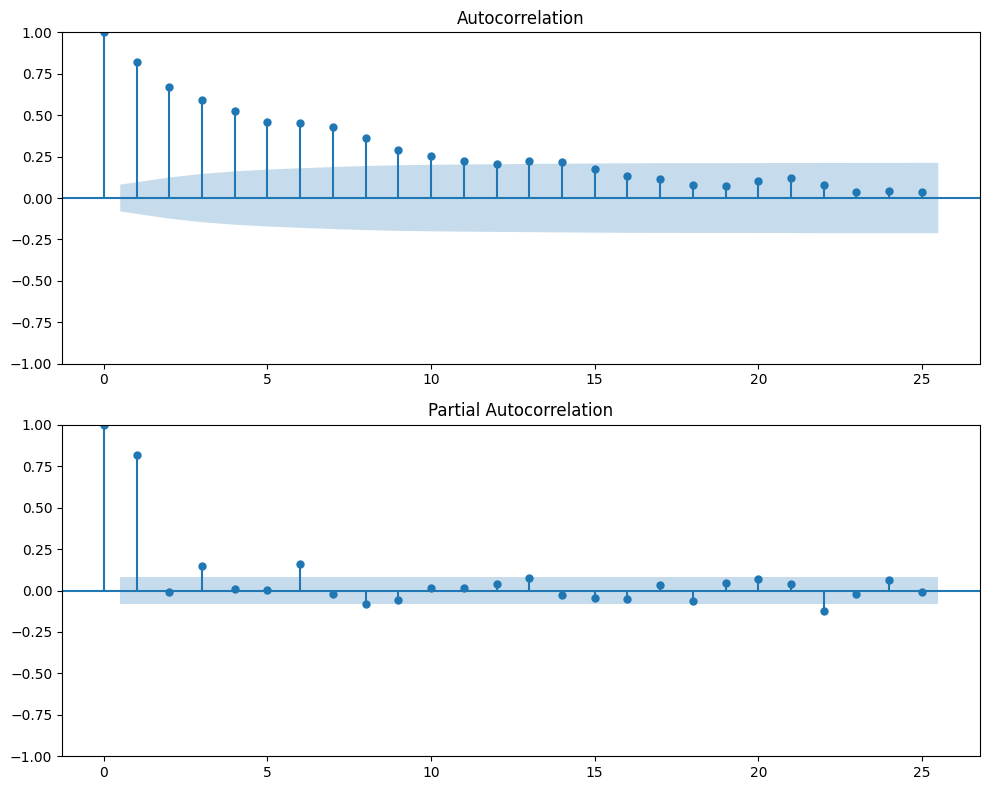

The ACF for LWAP is seen below
The PACF for LWAP is seen below


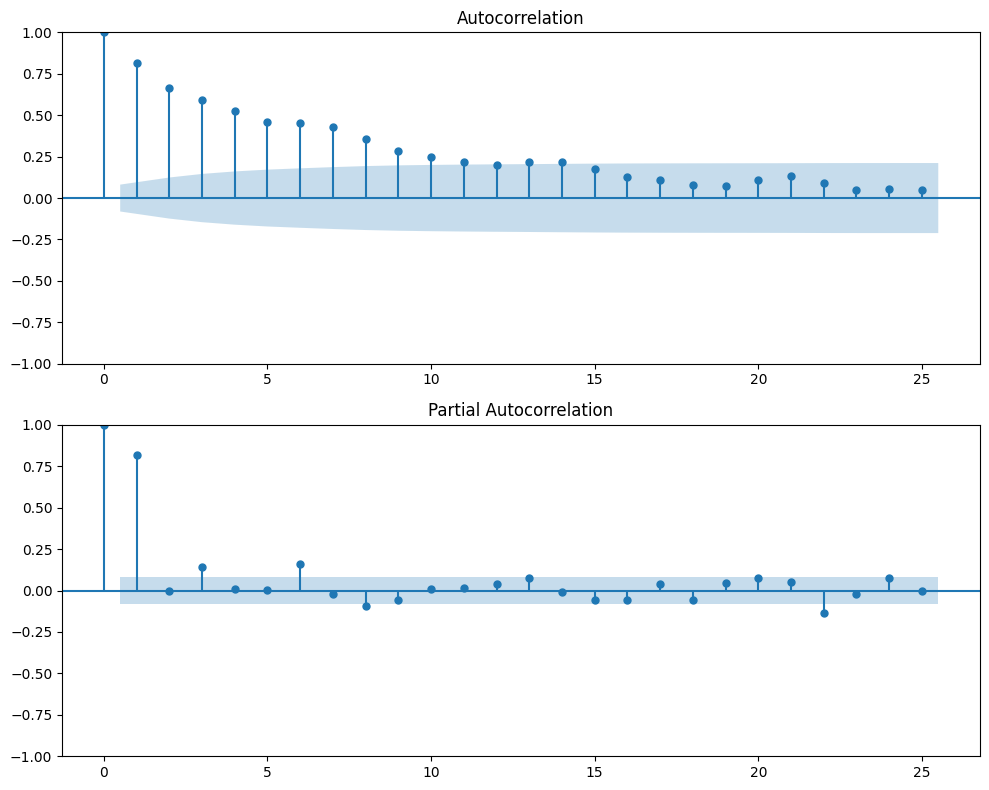

In [10]:
%run SARIMAX.py
plot_orders(GWAP_train, lags=25, alpha=0.05, var='GWAP')
plot_orders(LWAP_train, lags=25, alpha=0.05, var='LWAP')

GWAP and LWAP Forecasting

In [ ]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
GWAP_sarimax = seasonal_auto_arima(GWAP_train, max_p=1, max_d=2, max_q=13, exog_data=exog_train )

#Display results of previous function
GWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 6 and an AIC of -1070.7818442949656


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(0, 0, 1, 6), suppress_warnings=True)

In [ ]:
%run SARIMAX.py
#Run seasonal_auto_arima function on GWAP 
#Use max_p and max_q based on acf and pacf plots
LWAP_sarimax = seasonal_auto_arima(LWAP_train, max_p=1, max_d=2, max_q=14, exog_data=exog_train )

#Display results of previous function
LWAP_sarimax

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecatio

The model with the lowest AIC has a seasonal period of 7 and an AIC of -1030.783221940742


ARIMA(maxiter=300, method='powell', order=(1, 1, 1), scoring_args={},
      seasonal_order=(1, 0, 0, 7), suppress_warnings=True)

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -1.129346
         Iterations: 12
         Function evaluations: 1928
                                      SARIMAX Results                                      
Dep. Variable:                                GWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 14)   Log Likelihood                 659.538
Date:                             Sat, 15 Mar 2025   AIC                          -1285.076
Time:                                     15:03:26   BIC                          -1210.817
Sample:                                 01-01-2022   HQIC                         -1256.132
                                      - 08-07-2023                                         
Covariance Type:                               opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Optimization terminated successfully.
         Current function value: -1.057690
         Iterations: 11
         Function evaluations: 1792
                                      SARIMAX Results                                      
Dep. Variable:                                LWAP   No. Observations:                  584
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 14)   Log Likelihood                 617.691
Date:                             Sat, 15 Mar 2025   AIC                          -1201.382
Time:                                     15:04:03   BIC                          -1127.122
Sample:                                 01-01-2022   HQIC                         -1172.437
                                      - 08-07-2023                                         
Covariance Type:                               opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

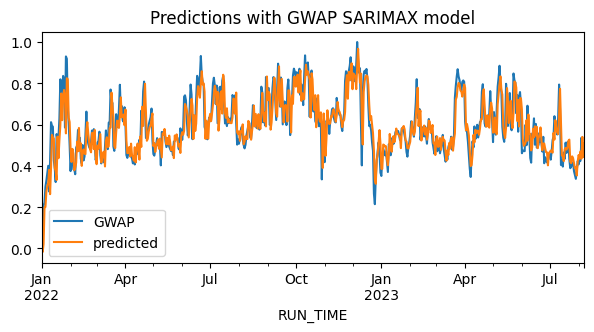

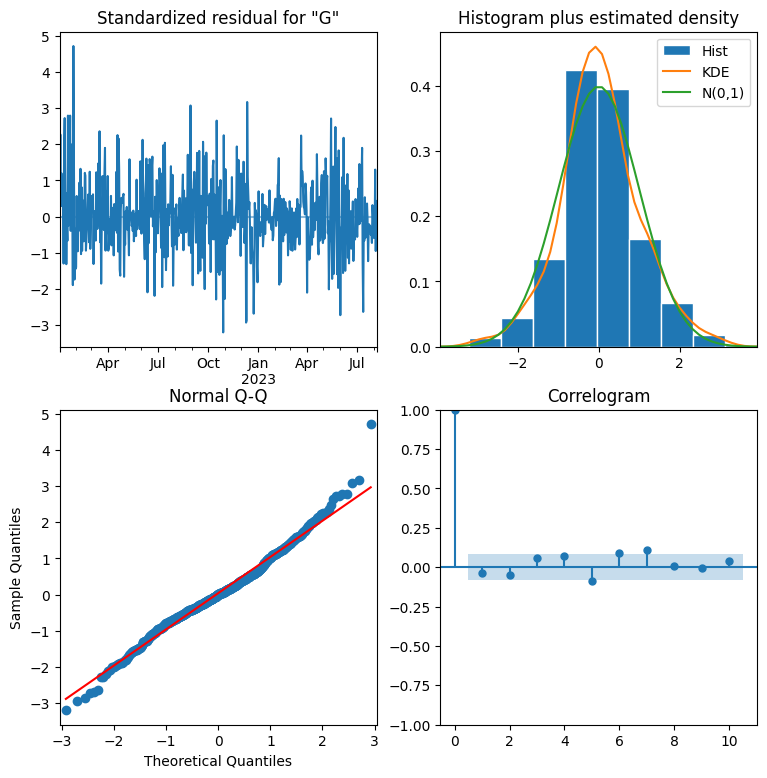

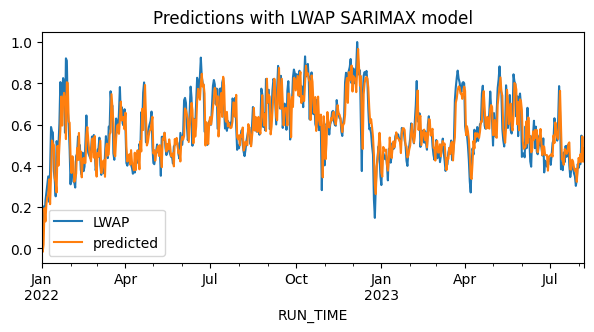

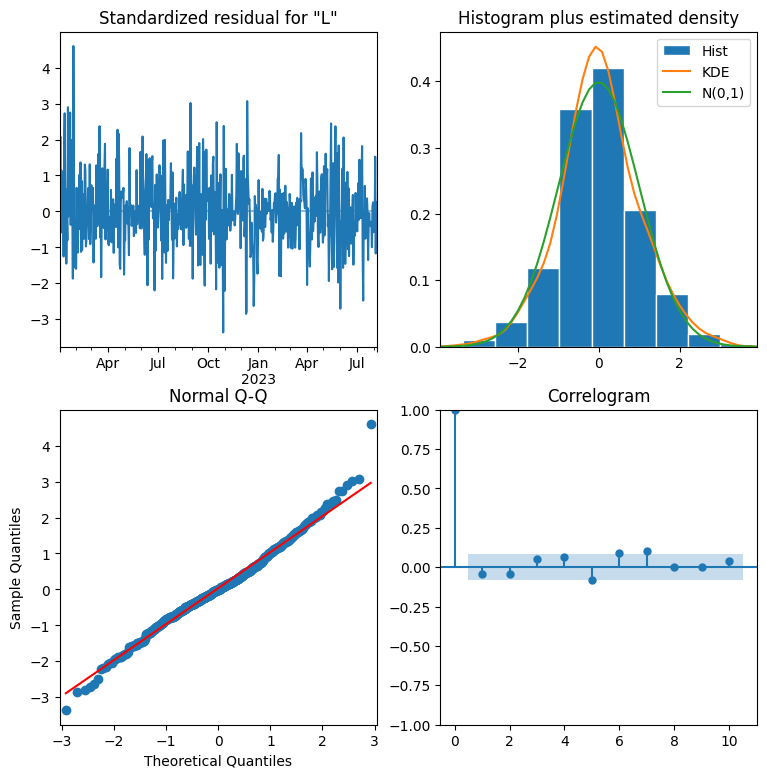

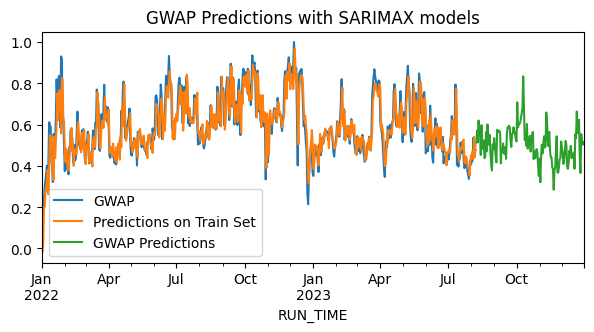

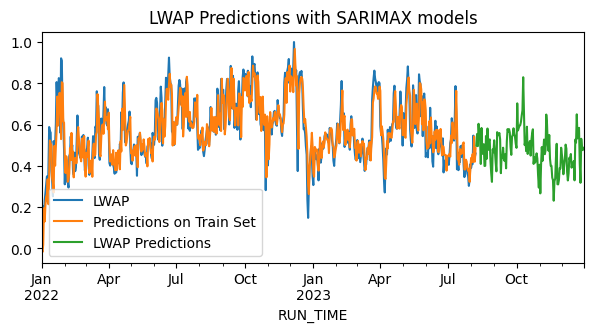

In [9]:
#Optimized orders for GWAP are (1,1,1)(2,0,0,14) and for LWAP are (1,1,1)(2,0,0)(14)
#This function fits the model and plots predictions on the train set; shows the summary of results and residuals diagnostics; and predicts on train set
%run SARIMAX.py

gwap_predictions, lwap_predictions, gwap_train_predict, lwap_train_predict = fit_SARIMAX(gwap_endog=GWAP_train, lwap_endog= LWAP_train, train_exog=exog_train, gwap_order=(1,1,1), gwap_seasonal_order=(2,0,0,14), lwap_order = (1,1,1), lwap_seasonal_order=(2,0,0,14), GWAP_test=GWAP_test, LWAP_test=LWAP_test, exog_test = exog_test)


Applying inverse transformations

In [10]:
#Covert predictions series to dataframe

gwap_predictions_df = gwap_predictions.to_frame(name='GWAP')
lwap_predictions_df = gwap_predictions.to_frame(name='LWAP')

In [11]:
%run transformscript.py

inverse_gwap_predictions = inverse_transform_data(gwap_predictions_df, 'SARIMAX', 'VIS', 'GWAP')
inverse_lwap_predictions = inverse_transform_data(lwap_predictions_df, 'SARIMAX', 'VIS', 'LWAP')

C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\Jojie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


Mean Absolute Error (MAE) on Test Set for GWAP: 1450.7614518799958
Root Mean Squared Error (RMSE) on Test Set for GWAP: 2233.5375717286206
Mean Absolute Percentage Error (MAPE) on Test Set for GWAP: 22.312554991164976


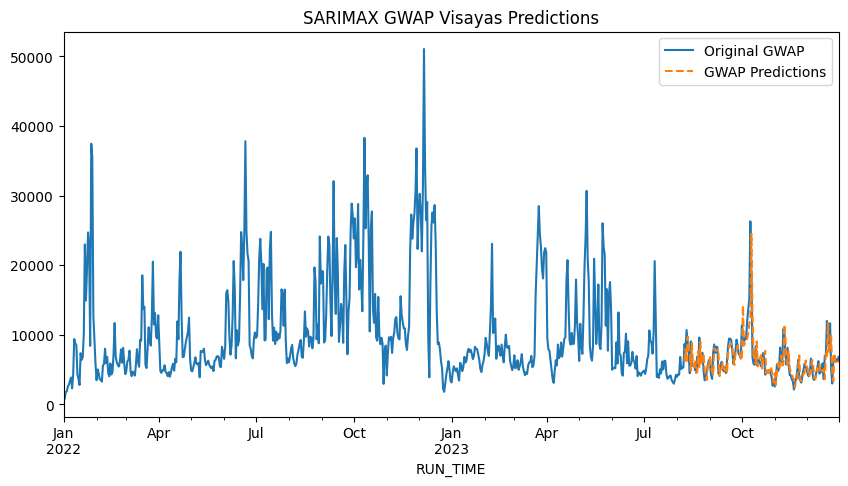

Mean Absolute Error (MAE) on Test Set for LWAP: 1670.4183391869292
Root Mean Squared Error (RMSE) on Test Set for LWAP: 2435.3915487201475
Mean Absolute Percentage Error (MAPE) on Test Set for LWAP: 26.338008571317918


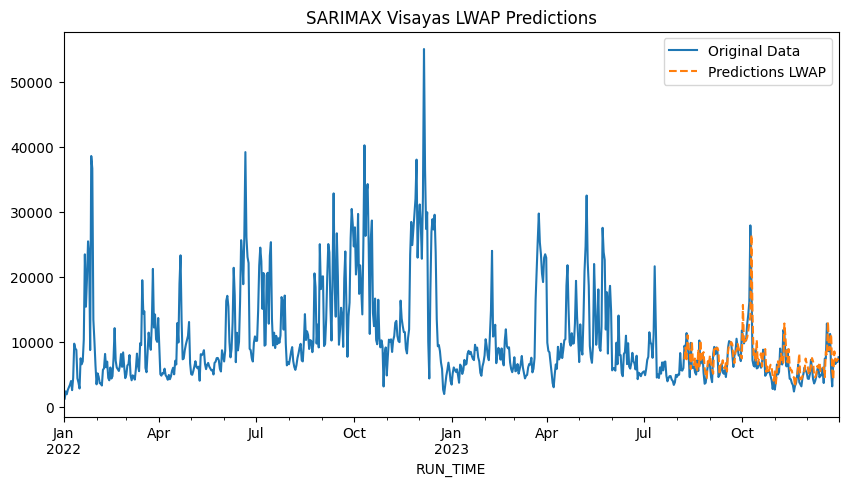

In [12]:
%run SARIMAX.py
gwap_mae_test, gwap_rmse_test, mape_test_gwap, mape_test_lwap, lwap_rmse_test, lwap_rmse_test = evaluate_models(complete_vis_gwap, complete_vis_lwap, GWAP_test_original = untransformed_GWAP_test, GWAP_predictions_inverse= inverse_gwap_predictions, LWAP_test_original=untransformed_LWAP_test, LWAP_predictions_inverse=inverse_lwap_predictions, Region = 'Visayas')

In [13]:
inverse_gwap_predictions.to_csv('vis-gwap-predictions.csv', index=False)
inverse_lwap_predictions.to_csv('vis-lwap-predictions.csv', index=False)